In [4]:
# importing all the libraries needed 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For date time functions
from datetime import datetime
from datetime import timedelta
import math

# Importing the most popular regression libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
train = './data/train_data.csv'
test = './data/test_data.csv'

df = pd.read_csv(train)
df2 = pd.read_csv(test)



In [6]:
df.head()

,id,mes,tipo_ban,tipo_seg,categoria,tipo_com,tipo_cat,tipo_cli,VAR1_sum,VAR1_prom,...,VAR27_sum,VAR27_prom,VAR27_trx,VAR28_sum,VAR28_prom,VAR28_trx,VAR29_prom,VAR29_ratio,VAR30_sum,target_mes
0,abdd0c8d3be5,202002,BAN1,NO PROD3,V5,COM4,RUBRO5,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,5b290c34ff68,202006,BAN1,PROD1,V2,COM2,RUBRO5,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17081.5,0.034,NaN,6.19
2,54b8678ab09b,201901,BAN1,PROD1/PROD2,V4,COM3,RUBRO3,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,706250.0,0.706,NaN,22.78
3,77e1b37ea594,202004,BAN1,NO PROD3,V6,COM4,RUBRO2,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7632694.0,0.954,NaN,55.06
4,7b6c7a3b57a9,202101,BAN1,PROD1,V2,COM2,RUBRO4,CLI2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,376664.0,0.443,70.0,0.19


In [7]:
df.tail()

,id,mes,tipo_ban,tipo_seg,categoria,tipo_com,tipo_cat,tipo_cli,VAR1_sum,VAR1_prom,...,VAR27_sum,VAR27_prom,VAR27_trx,VAR28_sum,VAR28_prom,VAR28_trx,VAR29_prom,VAR29_ratio,VAR30_sum,target_mes
667686,8f6563e9db13,202105,BAN1,PROD1/PROD4,V2,COM3,RUBRO7,CLI1,413118.0,13851.235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.28
667687,8f6563e9db13,202107,BAN1,PROD1/PROD4,V4,COM3,RUBRO7,CLI1,813092.0,20394.775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.69
667688,8f6563e9db13,202108,BAN1,PROD1/PROD4,V4,COM3,RUBRO7,CLI1,717389.0,22696.686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.28
667689,8f6563e9db13,202109,BAN1,PROD1/PROD4,V4,COM3,RUBRO7,CLI1,NaN,NaN,...,60000000.0,60000000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,30.56
667690,8f6563e9db13,202102,BAN1,SINPROD,V2,COM1,RUBRO7,CLI1,940309.0,20167.184,...,NaN,NaN,NaN,NaN,NaN,NaN,471983.0,0.236,NaN,32.97


In [8]:
# Variables numéricas

numerical = [var for var in df.columns if df[var].dtype!='O']

print('Existen {} variables numéricas \n'.format(len(numerical)))

print('Las variables numéricas son :', numerical)

Existen 63 variables numéricas 

Las variables numéricas son : ['mes', 'VAR1_sum', 'VAR1_prom', 'VAR1_trx', 'VAR2_sum', 'VAR2_prom', 'VAR2_trx', 'VAR3_sum', 'VAR3_prom', 'VAR3_trx', 'VAR4_sum', 'VAR4_prom', 'VAR4_trx', 'VAR5_sum', 'VAR5_prom', 'VAR5_trx', 'VAR6_sum', 'VAR6_prom', 'VAR6_trx', 'VAR7_sum', 'VAR7_prom', 'VAR7_trx', 'VAR8_sum', 'VAR8_prom', 'VAR8_trx', 'VAR9_sum', 'VAR9_prom', 'VAR9_trx', 'VAR10_sum', 'VAR11_sum', 'VAR12_sum', 'VAR13_sum', 'VAR14_sum', 'VAR15_sum', 'VAR16_sum', 'VAR17_sum', 'VAR18_sum', 'VAR19_sum', 'VAR20_sum', 'VAR21_sum', 'VAR22_sum', 'VAR23_sum', 'VAR23_prom', 'VAR23_trx', 'VAR24_sum', 'VAR24_prom', 'VAR24_trx', 'VAR25_sum', 'VAR25_prom', 'VAR25_trx', 'VAR26_sum', 'VAR26_prom', 'VAR26_trx', 'VAR27_sum', 'VAR27_prom', 'VAR27_trx', 'VAR28_sum', 'VAR28_prom', 'VAR28_trx', 'VAR29_prom', 'VAR29_ratio', 'VAR30_sum', 'target_mes']


In [9]:
#   Contando nulos

df[numerical].isnull().sum()

mes                 0
VAR1_sum       504757
VAR1_prom      504757
VAR1_trx       504757
VAR2_sum       573514
                ...  
VAR28_trx      597393
VAR29_prom     459257
VAR29_ratio    459257
VAR30_sum      626184
target_mes          0
Length: 63, dtype: int64

Text(0.5, 1.0, 'Distribución de ventas por fecha ')

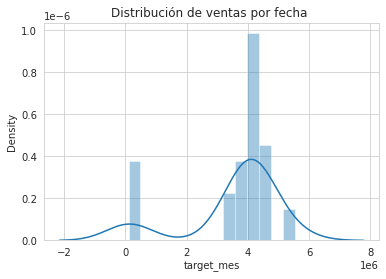

In [10]:
sns.distplot(df.groupby(['mes'])['target_mes'].sum())
sns.set(rc={'figure.figsize':(15.7,6.27)})
plt.title('Distribución de ventas por fecha ')

Text(0, 0.5, 'Ventas mensuales')

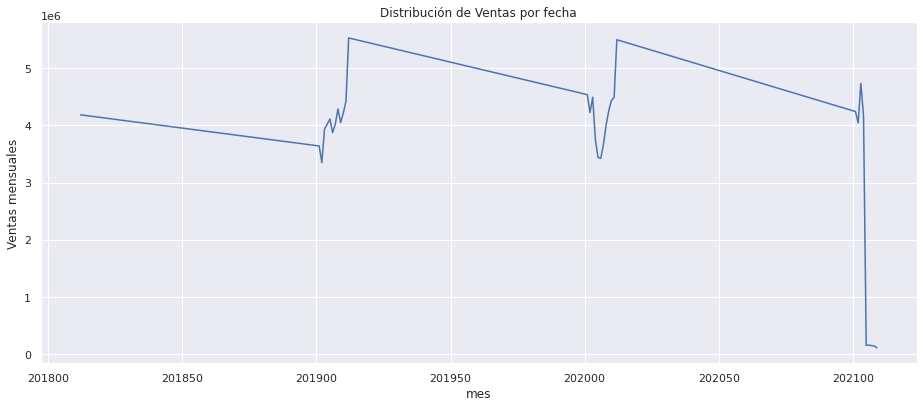

In [11]:
df.groupby(['mes'])['target_mes'].sum().plot()
plt.title('Distribución de Ventas por fecha')
plt.ylabel('Ventas mensuales')

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Existen {} variables categóricas \n'.format(len(categorical)))

print('Las variables categóricas son :', categorical)

Existen 7 variables categóricas 

Las variables categóricas son : ['id', 'tipo_ban', 'tipo_seg', 'categoria', 'tipo_com', 'tipo_cat', 'tipo_cli']


In [13]:
df[categorical].isnull().sum()

id           0
tipo_ban     0
tipo_seg     0
categoria    0
tipo_com     0
tipo_cat     0
tipo_cli     0
dtype: int64

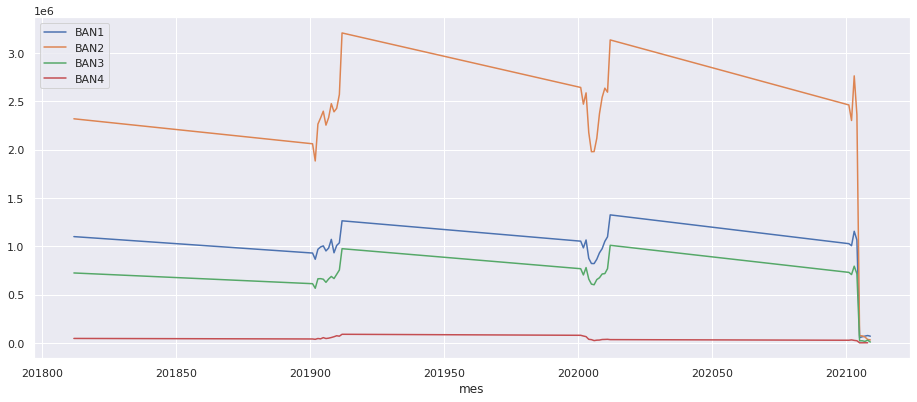

In [14]:
for var in ['BAN1', 'BAN2', 'BAN3', 'BAN4']:
    df[df['tipo_ban']==var].groupby(['mes'])['target_mes'].sum().plot(label=var)

sns.set(rc={'figure.figsize':(18.7,8.27)})
plt.legend()

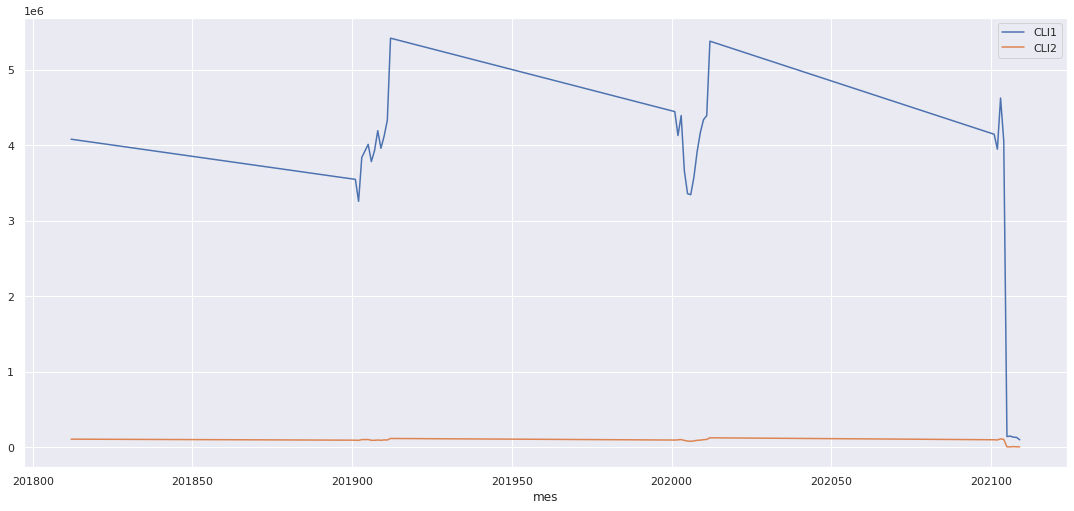

In [15]:
df[df['tipo_cli']=='CLI1'].groupby(['mes'])['target_mes'].sum().plot(label='CLI1')
df[df['tipo_cli']=='CLI2'].groupby(['mes'])['target_mes'].sum().plot(label='CLI2')

sns.set(rc={'figure.figsize':(18.7,8.27)})
plt.legend()

No handles with labels found to put in legend.


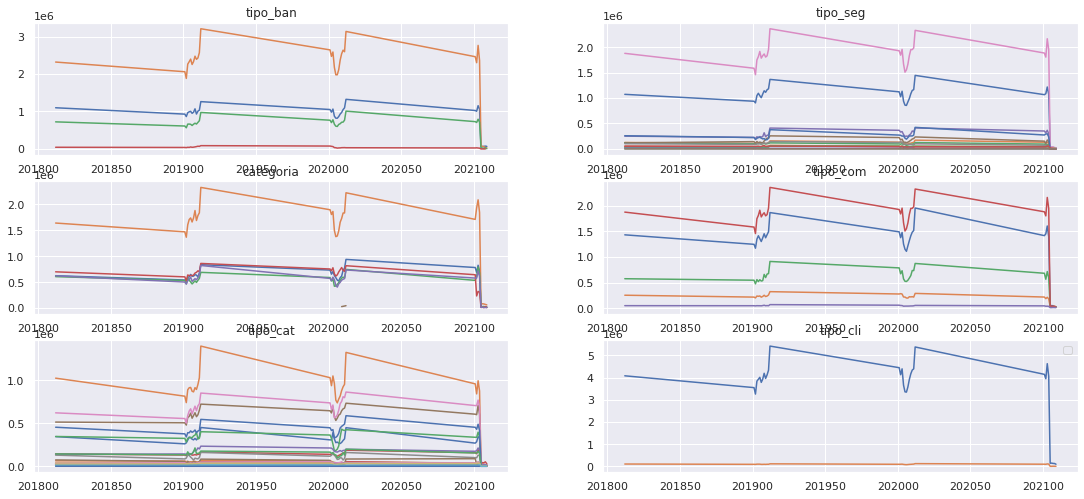

In [18]:
fig, axs = plt.subplots(3,2)


for cat,ax in zip(categorical[1:], axs.flatten()):
    
    vars = df[cat].unique()
    for var in vars:
        ax.plot(df[df[cat]==var].groupby(['mes'])['target_mes'].sum())
    ax.set_title(cat)

plt.legend()
plt.show()


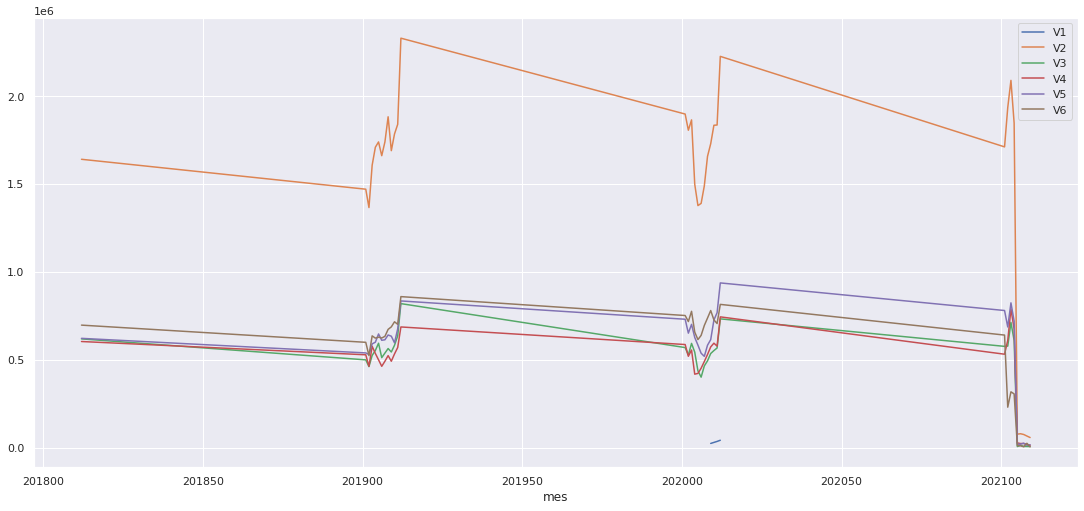

In [19]:


for var in ['V1', 'V2', 'V3', 'V4','V5', 'V6']:
    df[df['categoria']==var].groupby(['mes'])['target_mes'].sum().plot(label=var)

sns.set(rc={'figure.figsize':(18.7,8.27)})
plt.legend()

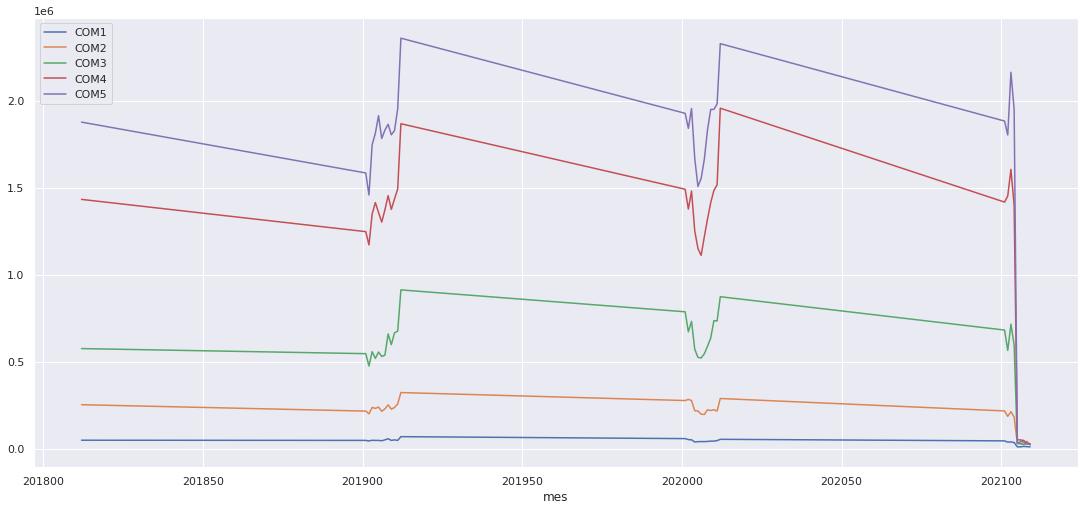

In [20]:
df[df['tipo_com']=='COM1'].groupby(['mes'])['target_mes'].sum().plot(label='COM1')
df[df['tipo_com']=='COM2'].groupby(['mes'])['target_mes'].sum().plot(label='COM2')
df[df['tipo_com']=='COM3'].groupby(['mes'])['target_mes'].sum().plot(label='COM3')
df[df['tipo_com']=='COM4'].groupby(['mes'])['target_mes'].sum().plot(label='COM4')
df[df['tipo_com']=='COM5'].groupby(['mes'])['target_mes'].sum().plot(label='COM5')


sns.set(rc={'figure.figsize':(18.7,8.27)})
plt.legend()

No handles with labels found to put in legend.


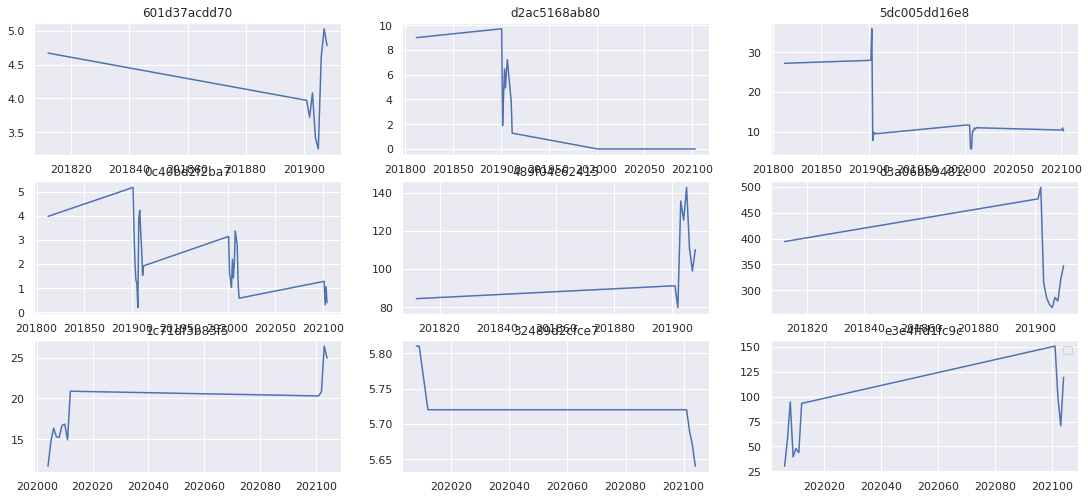

In [21]:
import random

customers = df.id.unique()
customers9 = random.choices(customers, k=9)
fig, axs = plt.subplots(3,3)

for c,ax in zip(customers9,axs.flatten()):
  
    ax.plot(df[df['id']==c].groupby(['mes'])['target_mes'].sum())
    ax.set_title(c)

plt.legend()
plt.show()

In [22]:
import scipy
scipy.__version__

'1.7.3'

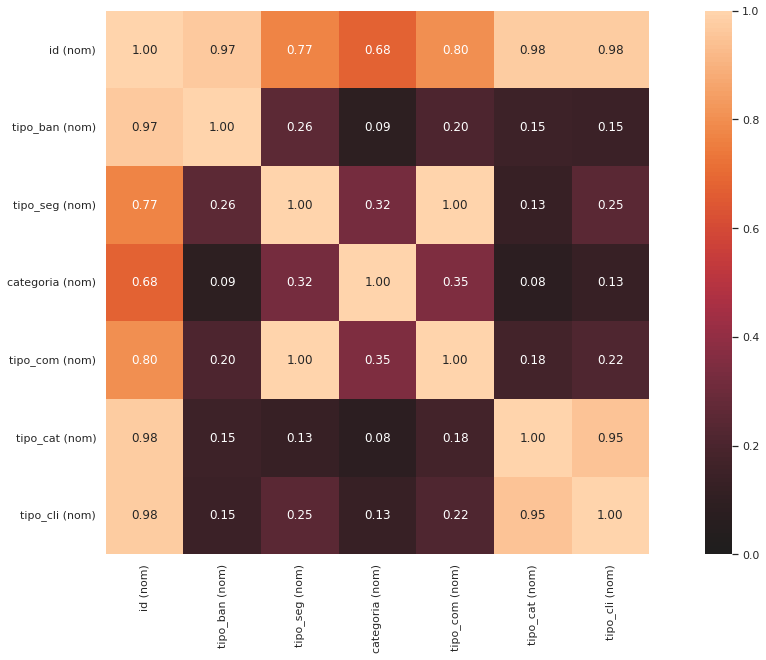

{'corr':                  id (nom)  tipo_ban (nom)  tipo_seg (nom)  categoria (nom)  \
 id (nom)         1.000000        0.967716        0.766325         0.678629   
 tipo_ban (nom)   0.967716        1.000000        0.257452         0.087321   
 tipo_seg (nom)   0.766325        0.257452        1.000000         0.323087   
 categoria (nom)  0.678629        0.087321        0.323087         1.000000   
 tipo_com (nom)   0.800362        0.203721        0.999992         0.345124   
 tipo_cat (nom)   0.975150        0.151374        0.125835         0.083368   
 tipo_cli (nom)   0.975136        0.145747        0.249109         0.131347   
 
                  tipo_com (nom)  tipo_cat (nom)  tipo_cli (nom)  
 id (nom)               0.800362        0.975150        0.975136  
 tipo_ban (nom)         0.203721        0.151374        0.145747  
 tipo_seg (nom)         0.999992        0.125835        0.249109  
 categoria (nom)        0.345124        0.083368        0.131347  
 tipo_com (nom)        

In [23]:
from dython import nominal

#categorical = ['tipo_ban', 'tipo_seg', 'categoria', 'tipo_com', 'tipo_cat', 'tipo_cli']

nominal.associations(df[categorical],figsize=(20,10),mark_columns=True)